In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import random

In [62]:
# Directory where the original data is stored
ORIGINAL_DATA_DIR = '../../../../EXOSAFE-DATA'
# Directory where the derived data is stored
DERIVED_DATA_DIR = '../../data'

# Number of force cells in the robotic leg
N_CELLS = 8

random.seed(0)

In [8]:
files = glob.glob(DERIVED_DATA_DIR + '/*/*')
files

['../../data/10032021/1',
 '../../data/16022021/1',
 '../../data/16022021/2',
 '../../data/16022021/3',
 '../../data/16022021/4',
 '../../data/16022021/5',
 '../../data/16022021/6',
 '../../data/17022021/2',
 '../../data/17022021/3',
 '../../data/17022021/4',
 '../../data/19022021/1',
 '../../data/19022021/10',
 '../../data/19022021/11',
 '../../data/19022021/12',
 '../../data/19022021/13',
 '../../data/19022021/14',
 '../../data/19022021/15',
 '../../data/19022021/16',
 '../../data/19022021/17',
 '../../data/19022021/18',
 '../../data/19022021/2',
 '../../data/19022021/3',
 '../../data/19022021/4',
 '../../data/19022021/5',
 '../../data/19022021/6',
 '../../data/19022021/7',
 '../../data/19022021/8',
 '../../data/19022021/9',
 '../../data/22022021/1',
 '../../data/22022021/10',
 '../../data/22022021/11',
 '../../data/22022021/12',
 '../../data/22022021/13',
 '../../data/22022021/14',
 '../../data/22022021/15',
 '../../data/22022021/16',
 '../../data/22022021/17',
 '../../data/22022021

In [13]:
data_df = pd.read_csv(files[0] + '/force_cells_processed.csv')
data_df

,F1x,F1y,F1z,F2x,F2y,F2z,F3x,F3y,F3z,F4x,...,F5z,F6x,F6y,F6z,F7x,F7y,F7z,F8x,F8y,F8z
0,7.491469,1.582642,-9.755124,8.350557,9.431802,13.26993,-30.0404,9.765010,-52.576072,4.959810,...,64.520584,13.405800,-1.060523,-26.506486,7.384859,-12.633430,-7.207275,20.463140,7.304702,35.7400
1,7.491469,1.582642,-9.755124,8.350557,9.431802,13.26993,-30.0404,9.765010,-52.576072,4.959810,...,64.520584,13.405800,-1.060523,-26.506486,7.384859,-12.633430,-7.207275,20.463140,7.304702,35.7400
2,7.465492,1.555487,-9.851480,8.388767,9.437240,13.26424,-29.8988,9.817578,-52.714848,4.996551,...,64.450721,13.440096,-1.055010,-26.510363,7.336610,-12.657420,-7.152671,20.523880,7.112090,35.8168
3,7.465492,1.555487,-9.851480,8.388767,9.437240,13.26424,-29.8988,9.817578,-52.714848,4.996551,...,64.450721,13.440096,-1.055010,-26.510363,7.336610,-12.657420,-7.152671,20.523880,7.112090,35.8168
4,7.454359,1.495746,-9.783464,8.377304,9.323042,13.29838,-30.0404,9.515312,-52.525608,5.021045,...,64.505876,13.405800,-1.121166,-26.556887,7.513523,-12.609440,-7.330134,20.560324,7.167122,35.7400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,6.945952,0.675665,-7.788328,-1.641358,15.772510,23.95575,-47.5280,17.886766,-38.736320,7.311234,...,38.583026,33.423232,-3.359444,-57.417807,14.477462,-8.291240,-25.035481,31.116936,-13.827586,35.7912
6000,6.945952,0.675665,-7.788328,-1.641358,15.772510,23.95575,-47.5280,17.886766,-38.736320,7.311234,...,38.583026,33.423232,-3.359444,-57.417807,14.477462,-8.291240,-25.035481,31.116936,-13.827586,35.7912
6001,6.890287,0.469287,-7.612620,-1.438845,14.576150,23.92730,-43.9408,12.156854,-43.845800,6.968318,...,40.667885,30.205124,-6.634166,-56.018210,15.828434,-8.207275,-26.632648,31.080492,-15.052048,35.7912
6002,6.890287,0.469287,-7.612620,-1.438845,14.576150,23.92730,-43.9408,12.156854,-43.845800,6.968318,...,40.667885,30.205124,-6.634166,-56.018210,15.828434,-8.207275,-26.632648,31.080492,-15.052048,35.7912


In [16]:
original_signal = data_df['F3x'].values

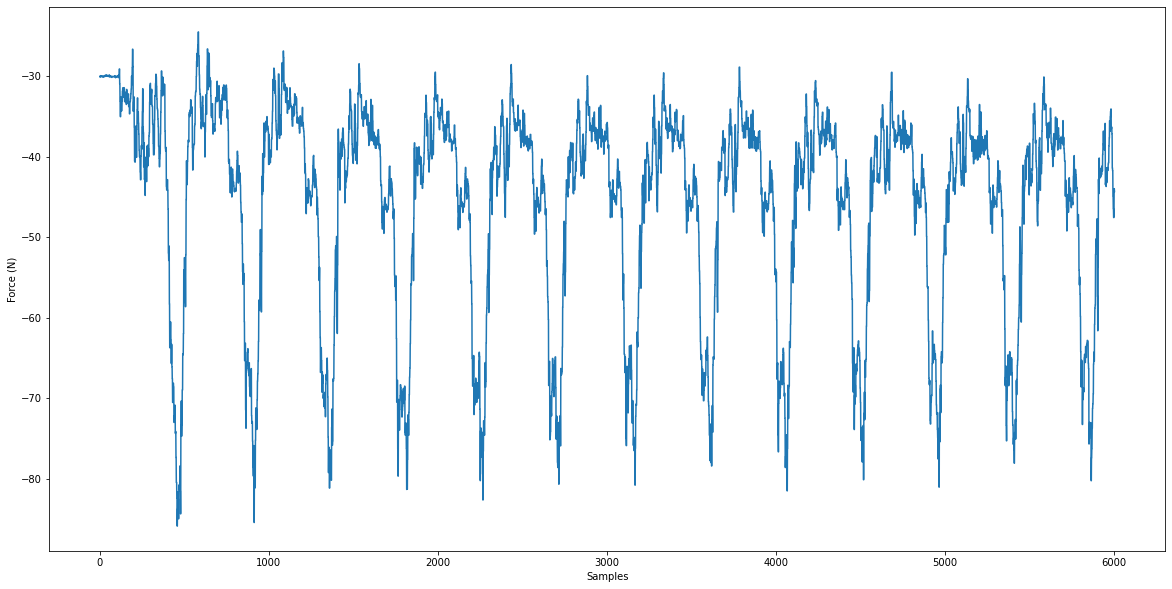

In [17]:
plt.figure(figsize=(20,10))
plt.plot(original_signal)
plt.xlabel('Samples')
plt.ylabel('Force (N)')
plt.show()

In [58]:
augmented_signal_1 = original_signal * 1.2
augmented_signal_2 = original_signal - augmented_signal_1
augmented_signal_3 = original_signal  + augmented_signal_2

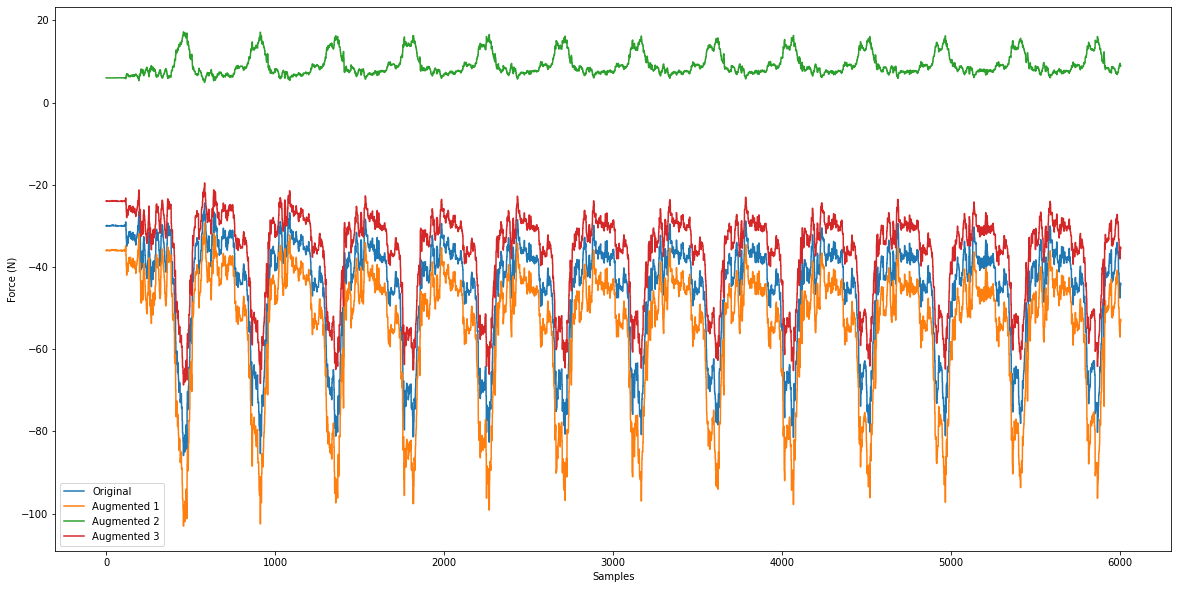

In [59]:
plt.figure(figsize=(20,10))
plt.plot(original_signal, label='Original')
plt.plot(augmented_signal_1, label='Augmented 1')
plt.plot(augmented_signal_2, label='Augmented 2')
plt.plot(augmented_signal_3, label='Augmented 3')
plt.xlabel('Samples')
plt.ylabel('Force (N)')
plt.legend()
plt.show()

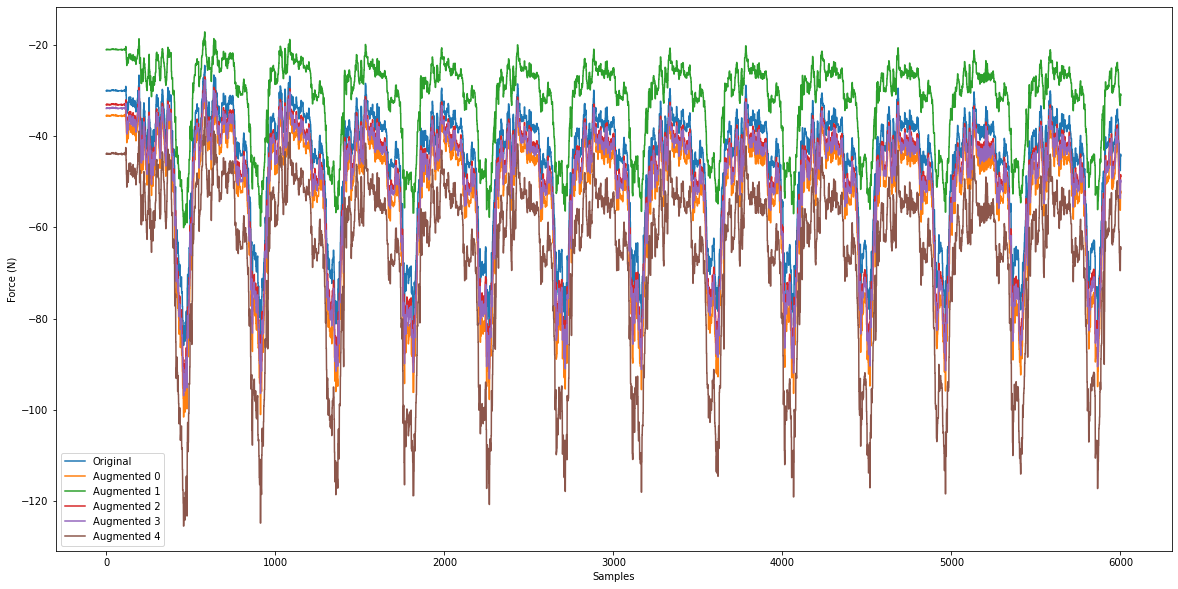

In [61]:
plt.figure(figsize=(20,10))
plt.plot(original_signal, label='Original')

for i in range(5):
    x = random.uniform(0.5, 1.5)
    augmented_signal = original_signal + (original_signal - (original_signal * x))    
    plt.plot(augmented_signal, label='Augmented {}'.format(i))
    
plt.xlabel('Samples')
plt.ylabel('Force (N)')
plt.legend()
plt.show()